In [1]:
from alefuncs import *
from collections import Counter

/Users/amarcozzi/Documents/GRCh37/sequence_8.txt
/Users/amarcozzi/Documents/GRCh37/sequence_Y.txt
/Users/amarcozzi/Documents/GRCh37/sequence_X.txt
/Users/amarcozzi/Documents/GRCh37/sequence_9.txt
/Users/amarcozzi/Documents/GRCh37/sequence_22.txt
/Users/amarcozzi/Documents/GRCh37/sequence_20.txt
/Users/amarcozzi/Documents/GRCh37/sequence_21.txt
/Users/amarcozzi/Documents/GRCh37/sequence_19.txt
/Users/amarcozzi/Documents/GRCh37/sequence_18.txt
/Users/amarcozzi/Documents/GRCh37/sequence_16.txt
/Users/amarcozzi/Documents/GRCh37/sequence_17.txt
/Users/amarcozzi/Documents/GRCh37/sequence_15.txt
/Users/amarcozzi/Documents/GRCh37/sequence_14.txt
/Users/amarcozzi/Documents/GRCh37/sequence_10.txt
/Users/amarcozzi/Documents/GRCh37/sequence_11.txt
/Users/amarcozzi/Documents/GRCh37/sequence_13.txt
/Users/amarcozzi/Documents/GRCh37/sequence_12.txt
/Users/amarcozzi/Documents/GRCh37/sequence_2.txt
/Users/amarcozzi/Documents/GRCh37/sequence_3.txt
/Users/amarcozzi/Documents/GRCh37/sequence_1.txt
/Users/

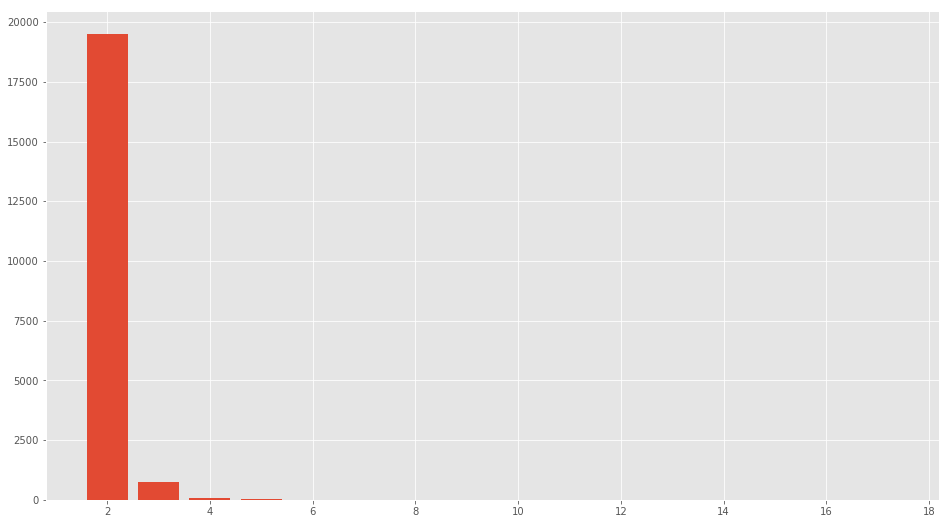

[(2, 19511), (3, 762), (4, 74), (5, 15), (6, 7), (7, 4), (9, 3), (8, 2), (10, 2), (17, 1)]


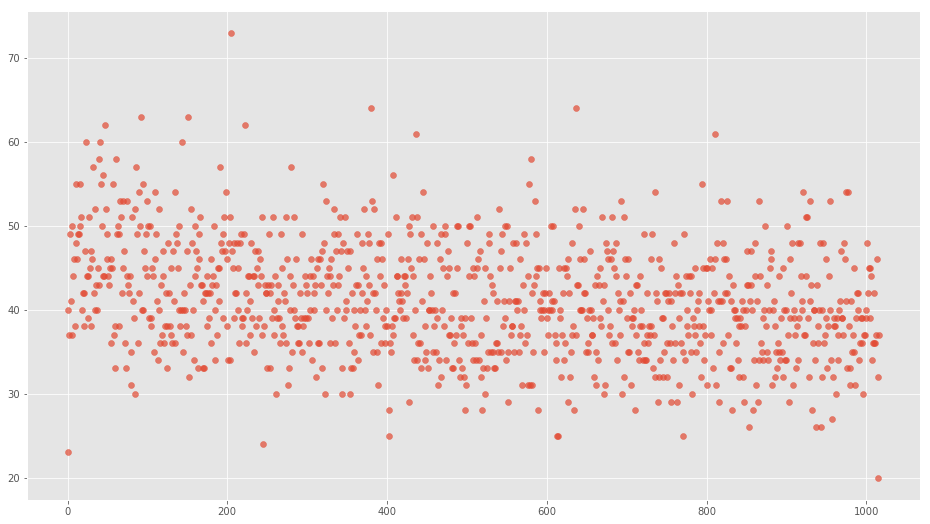

[(205, 73), (636, 64), (380, 64), (151, 63), (92, 63), (222, 62), (47, 62), (811, 61), (436, 61), (23, 60)]


In [2]:
##Map restriction sites on Human Genome
SrfI = 'GCCCGGGC' #Restriction site

pieces_count = Counter()
pieces_len = Counter()

for file in list_of_files('/Users/amarcozzi/Documents/GRCh37','txt'):
    if 'sequence' in file:
        print(file)
    with open(file, 'r') as f:
        for seq in read_in_chunks(f):
            pieces = seq.split(SrfI)
            blocks = len(pieces)
            if blocks > 1:
                pieces_count.update({blocks})
                for p in pieces:
                    pieces_len.update({len(p)})
                    
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
plt.bar(pieces_count.keys(),pieces_count.values())
plt.show()
print(pieces_count.most_common(10))

plt.style.use('ggplot')
plt.figure(figsize=(16,9))
plt.scatter(pieces_len.keys(),pieces_len.values(), alpha=0.7)
plt.show()
print(pieces_len.most_common(10))

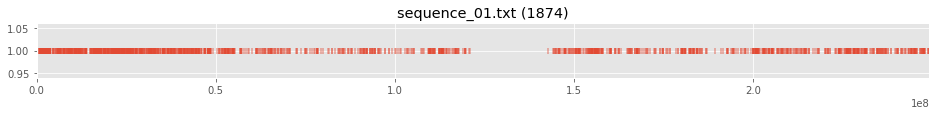

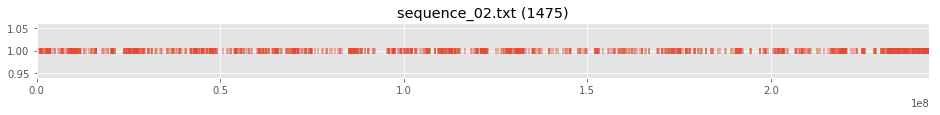

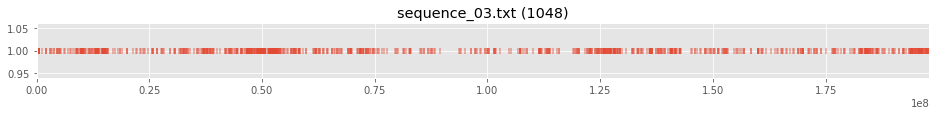

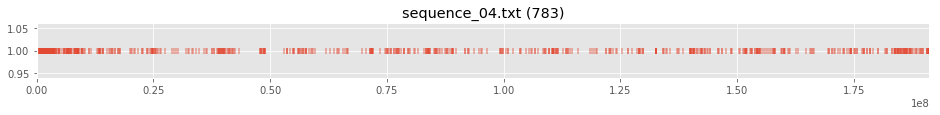

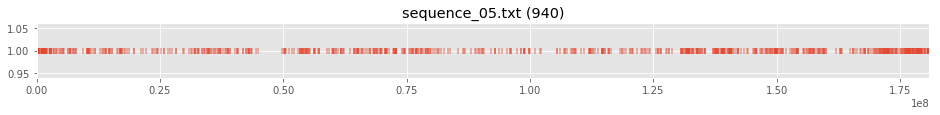

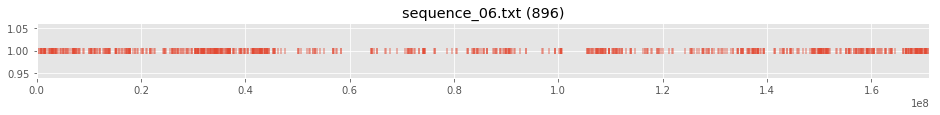

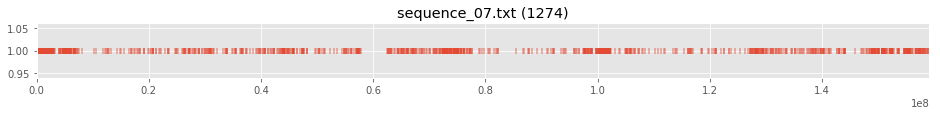

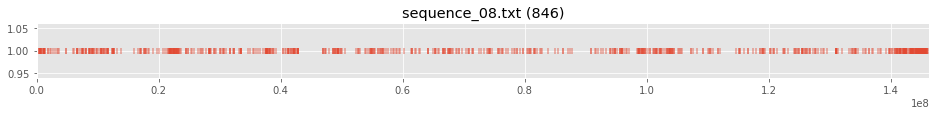

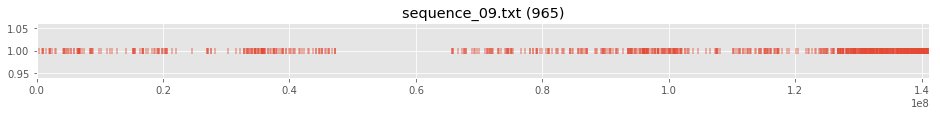

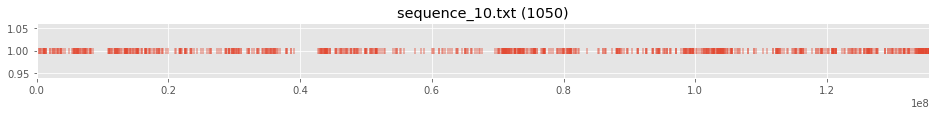

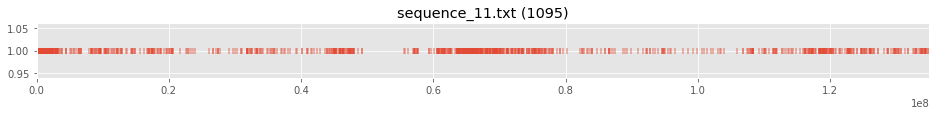

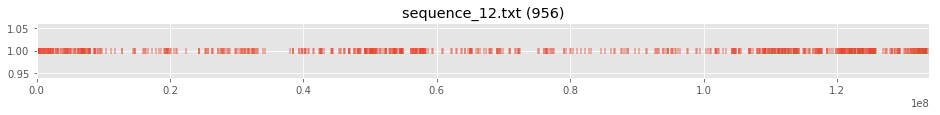

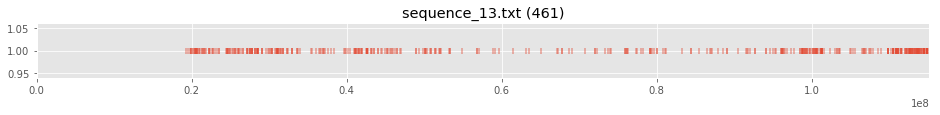

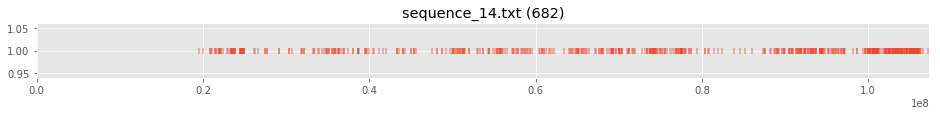

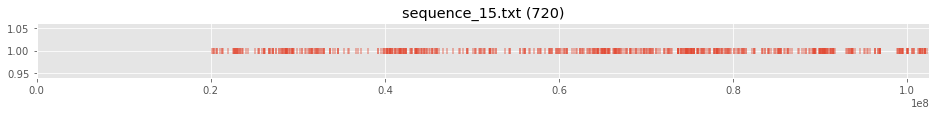

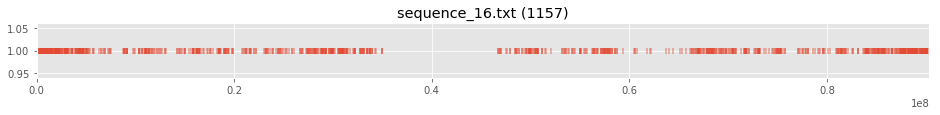

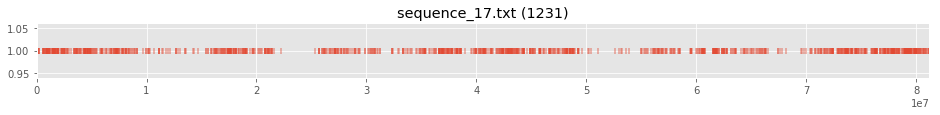

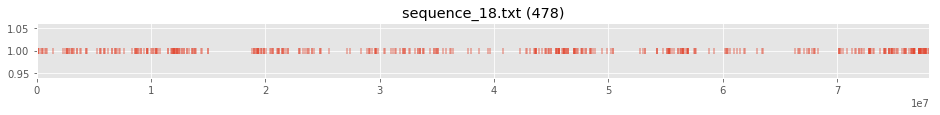

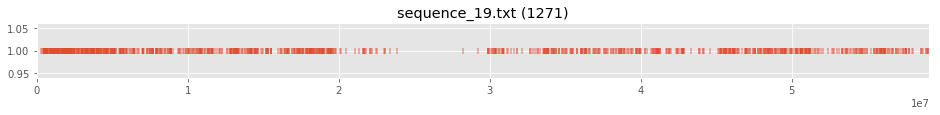

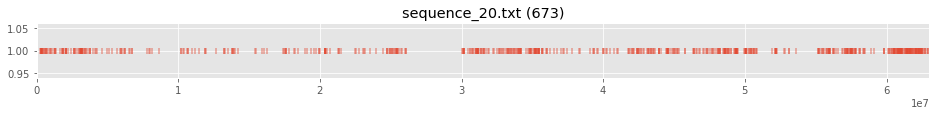

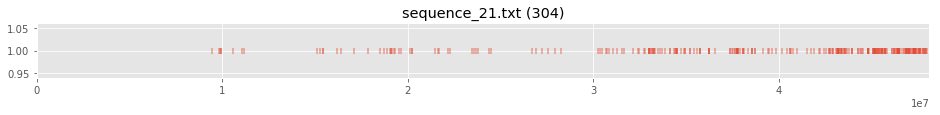

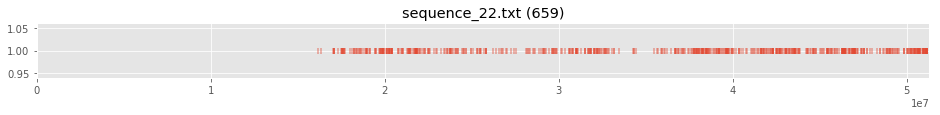

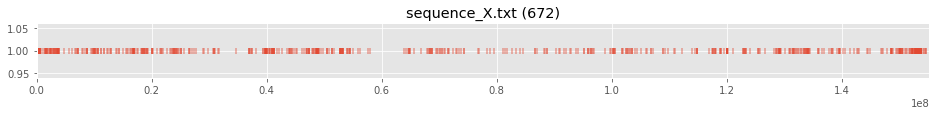

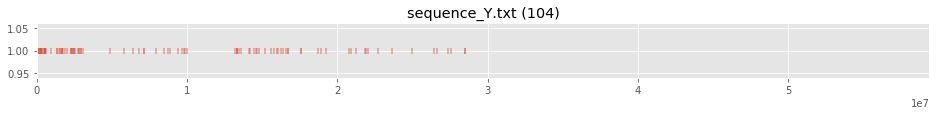

21614


In [45]:
total_sites = 0
#seq_len = []
for file in sorted(list_of_files('/Users/amarcozzi/Documents/GRCh37','txt')):
    if 'sequence' in file:
        #print(file)
        with open(file, 'r') as f:
            s = ''.join(f.readlines())
            #seq_len.append(len(s))
            srfi_pos = [m.start() for m in re.finditer(SrfI, s)]
            total_sites += len(srfi_pos)
            plt.style.use('ggplot')
            plt.figure(figsize=(16,1))
            y = [1 for n in srfi_pos]
            plt.xlim(0,len(s))#2.5*10**8)
            #plt.xlim(10**6,2*10**6) #Megabase
            plt.scatter(srfi_pos, y, marker="|", alpha=0.5)
            plt.title(f'{file.split("/")[-1]} ({len(srfi_pos)})')
            plt.show()
print(total_sites)

In [55]:
##What is the least represented 8-cutter?
from itertools import product
g = [''.join(x) for x in product('ATCG', repeat=8)]

re_sites = Counter()
for file in sorted(list_of_files('/Users/amarcozzi/Documents/GRCh37','txt')):
    if 'sequence' in file:
        print(file)
        with open(file, 'r') as f:
            s = ''.join(f.readlines())
            for re_site in g:
                srfi_pos = [m.start() for m in re.finditer(re_site, s)]
                re_sites.update({re_site:len(srfi_pos)})

/Users/amarcozzi/Documents/GRCh37/sequence_01.txt
/Users/amarcozzi/Documents/GRCh37/sequence_02.txt
/Users/amarcozzi/Documents/GRCh37/sequence_03.txt
/Users/amarcozzi/Documents/GRCh37/sequence_04.txt
/Users/amarcozzi/Documents/GRCh37/sequence_05.txt
/Users/amarcozzi/Documents/GRCh37/sequence_06.txt
/Users/amarcozzi/Documents/GRCh37/sequence_07.txt
/Users/amarcozzi/Documents/GRCh37/sequence_08.txt


KeyboardInterrupt: 

In [54]:
re_sites

Counter({'AAAAAAAA': 93177,
         'AAAAAAAT': 57858,
         'AAAAAAAC': 25400,
         'AAAAAAAG': 49671,
         'AAAAAATA': 42952,
         'AAAAAATT': 43322,
         'AAAAAATC': 16983,
         'AAAAAATG': 23295,
         'AAAAAACA': 27946,
         'AAAAAACT': 14049,
         'AAAAAACC': 11278,
         'AAAAAACG': 1828,
         'AAAAAAGA': 42963,
         'AAAAAAGT': 18097,
         'AAAAAAGC': 11398,
         'AAAAAAGG': 15838,
         'AAAAATAA': 47283,
         'AAAAATAT': 29569,
         'AAAAATAC': 37740,
         'AAAAATAG': 16326,
         'AAAAATTA': 55385,
         'AAAAATTT': 24813,
         'AAAAATTC': 12924,
         'AAAAATTG': 13646,
         'AAAAATCA': 20812,
         'AAAAATCT': 14490,
         'AAAAATCC': 9423,
         'AAAAATCG': 1211,
         'AAAAATGA': 20871,
         'AAAAATGT': 19888,
         'AAAAATGC': 11690,
         'AAAAATGG': 12534,
         'AAAAACAA': 33951,
         'AAAAACAT': 15256,
         'AAAAACAC': 11810,
         'AAAAACAG': 14

In [ ]:
#sequence_from_coordinates(chromosome, strand, start, end, ref_genome=37)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

d = {
"96aae169-bc81-4618-80f4-0b81915f0fb9_read_2504_ch_32":"R:9:29269340:205",
"e12f6292-861e-42b8-9e8b-942884882eca_read_2321_ch_334":"F:17:7579504:120",
"1f12d72c-02dd-4ae0-9e55-c0fce6c58330_read_2497_ch_167":"F:11:57159720:125",
"e09a6c18-e9f4-44e0-9f0f-e46d94cd4f3c_read_2299_ch_83":"F:1:154327669:185",
"2a7a4e84-875a-462d-88a1-3dc4c17b2cd1_read_8252_ch_184":"F:4:165596749:155",
"47cdee0f-e647-437a-bd1e-4ade976e778b_read_26132_ch_354":"F:2:4750500:140",
"453347fb-8258-48ed-ab06-934da55176e2_read_1204_ch_398":"F:6:111180000:175",
"d67d9285-4929-44df-aa54-499c05bd92d3_read_32133_ch_56":"F:22:20830956:175"
}

for k,v in d.items():
    o, c, s, ml, = [n for n in v.split(':')]
    
    s = sequence_from_coordinates(chromosome=int(c),
                              strand=1,
                              start=int(s),
                              end=int(s)+int(ml),
                              ref_genome=37)
    if o == 'R':
        s = reverse(complement(s))
    print(f'>{k} - {o}')
    print(s,'\n')

In [ ]:
reverse(complement('GGGCATGCACAGATGTACACGAATCCCGAAGATGTTGTCCATTCATTGAATATGAGATCTCATGGTATGATCAATATCGGATGCGATATTGATACTGATAAATCATATATGCATAATCTCACATTATATTTATTATAATAAATCATCGTAGATATACACAATGTGAATTGTATACAATGGATAGTATAACTATCCAATTTCTTTGAGCATTGGCCTTGGTGTAGATGCTGCATGACATAGCCC'))

In [ ]:
_int    = list(range(1000))              #from 0 to 999
_float  = [0.001*i for i in range(1001)] #from 0.0 to 1.0
_num    = ['_int', '_float']
_list   = ['_list_of_int', '_list_of_float', '_list_of_num', '_complex_list']
_bool   = [True, False]
_var    = ['_int', '_float', '_num', '_list', '_bool']


_math_op       = ['+', '-', '*', '**', '/', '//', '%']
_comparison_op = ['==', '!=', '<>', '>', '<', '>=', '<=']
_assignment_op = ['=', '+=', '-=', '*=', '/=', '//=']
_bitwise_op    = ['&', '|', '^', '~', '<<', '>>']
_membership_op = ['in', 'not in']
_identity_op   = ['is', 'is not']


_while_OP = ['_comparison_op', '_membership_op', '_identity_op']
_if_OP    = ['_comparison_op', '_membership_op', '_identity_op']


for_loop = \
[
'for i in _list',
'for n in range(_int)',
'for n,i in enumerate(_list)'
]


while_loop = \
[
'while _bool',
'while _num _while_OP _num'
]


if_stmt = \
[
'if _var _membership_op _list',
'if _var _comparison_op _var',
'elif _var _membership_op _list',
'elif _var _comparison_op _var',
'else'
]


flow_ctrl = \
[
'break',
'continue',
'pass'
]


blocks = 3
max_indent = 2

for _ in range(blocks):
    block = ''
    for n in range(max_indent):
        indent = '\t'*n

In [ ]:
import random

def gen_code(complexity=3, nest_lvl=2):
    '''
    Generates a code template made by 'complexity' blocks.
    Each block will be formed by 'nest_lvl' nested loops/if-stmt.
    
    Example:
    >>> a = gen_code(1,2)
        for line in a.split('\n'):
            print(line)
    
    >>> for variable in range(variable):
            do_nothing()
            for variable in iterable:
                do_something(variable)
    '''
    
    def replace(string, word, replacers):
        while word in string:
            string = string.replace(word, random.choice(replacers), 1)
        return string  

    if complexity:
        if type(complexity) == type(nest_lvl) == type(1):
            pass
        else:
            raise ValueError('complexity and nest_lvl must be positive integers.')
    else:
        raise ValueError('complexity must be greater than 0.')
    
    
    variables            = ['_x','_y','_z','_n','_i','_j',]
    iterables            = ['_string','_list', '_tuple', '_dict']
    math_operators       = ['+','-','*','**','/','//','%']
    comparison_operators = ['==','!=','<>','>','<','>=','<=']
    assignment_operators = ['=','+=','-=','*=','/=','//=']
    bitwise_operators    = ['&','|','^','~','<<','>>']
    membership_operators = ['in','not in']
    identity_operators   = ['is','is not']
    
    constructs = ['for variable in iterable:',
                  'for variable in range(variable):',
                  'for variable in range(len(iterable)):',

                  'while variable comparison_operators variable:',
                  'while variable membership_operators iterable:',

                  'if variable comparison_operators variable:',
                  'if variable membership_operators iterable:',
                  'if variable identity_operators variable:',

                  'elif variable comparison_operators variable:',
                  'elif variable membership_operators iterable:',
                  'elif variable identity_operators variable:',

                  'else:']

    functions = ['_f1(variable)',
                 '_f2(iterable)',
                 '_f3()',
                 'results.append(variable)']



    block = []
    begin  = [item for item in constructs[0:8]]
    middle = [item for item in constructs[8:]]

    for n in range(complexity):
        if nest_lvl == 0:
            block.append(random.sample(functions,1)[0])
            
        else:
            for lvl in range(nest_lvl):
                ind = lvl*'\t'
                block.append(ind + random.sample(begin,1)[0]) #first_line
                for m in range(random.randint(1,complexity)):
                    block.append('{}{}'.format(ind + '\t',*random.sample(functions,1)))
                ind += '\t'
        

    code = ''''''
    for item in block:
        item = replace(item, 'variable', variables)
        item = replace(item, 'iterable', iterables)
        item = replace(item, 'math_operators', math_operators)
        item = replace(item, 'comparison_operators', comparison_operators)
        item = replace(item, 'assignment_operators', assignment_operators)
        item = replace(item, 'bitwise_operators', bitwise_operators)
        item = replace(item, 'membership_operators', membership_operators)
        item = replace(item, 'bitwise_operators', assignment_operators)
        item = replace(item, 'identity_operators', identity_operators)
        code += item + '\n'
    
    
    return code

In [ ]:
from alefuncs import Timeout
import time

with Timeout(1):
    print(gen_code(1,2))
    print(gen_code(2,1))
    time.sleep(2)

In [ ]:
from alefuncs import *

In [ ]:
import sys
!%sys.executable -m pip install tensorflow

In [68]:
with open('test.pkl', 'wb') as f:
    pickle.dump(df, f)

In [69]:
with open('test.pkl', 'rb') as f:
    df_ = pickle.load(f)
df_.head()

,A,B,C
0,500.0,10,12.0
1,NaN,20,18.0
2,NaN,30,NaN


In [3]:
d = {'A':[500], 'B':[10,20,30], 'C':[12,18]}
l = max([len(v) for k,v in d.items()])
for k,v in d.items():
    while len(d[k]) < l:
        d[k].append(np.nan)
df = pd.DataFrame(d)
df.head()

,A,B,C
0,500.0,10,12.0
1,NaN,20,18.0
2,NaN,30,NaN


In [20]:
total_size(df)

176

In [22]:
total_size(d, verbose=1)

240 <class 'dict'> {'A': [500, nan, nan], 'B': [10, 20, 30], 'C': [12, 18, nan]}
58 <class 'str'> 'A'
104 <class 'list'> [500, nan, nan]
28 <class 'int'> 500
24 <class 'float'> nan
58 <class 'str'> 'B'
88 <class 'list'> [10, 20, 30]
28 <class 'int'> 10
28 <class 'int'> 20
28 <class 'int'> 30
58 <class 'str'> 'C'
112 <class 'list'> [12, 18, nan]
28 <class 'int'> 12
28 <class 'int'> 18


910

In [25]:
sum(df.memory_usage())

152

In [24]:
80+24+24+24

152